# P3

In [42]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [43]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi_yi = sum(x * y for x, y in zip(xs, ys))
    sum_xi = sum(xs)
    sum_xi2 = sum(x**2 for x in xs)
    sum_yi = sum(ys)

    c_1 = sum_xi2  
    c_0 = sum_xi   
    c_ind = sum_xi_yi  

    return c_1, c_0, c_ind


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi = sum(xs)
    sum_yi = sum(ys)
    sum_xi_yi = sum(x * y for x, y in zip(xs, ys))

    c_1 = sum_xi  
    c_0 = n  
    c_ind = sum_yi  

    return c_1, c_0, c_ind

## Conjunto de datos 1

In [44]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

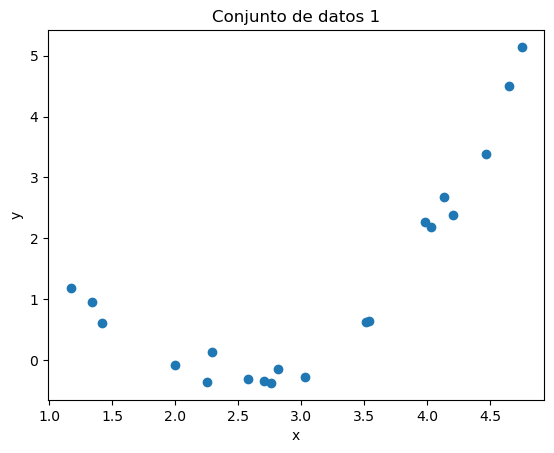

In [45]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [46]:
%autoreload 2
from src import ajustar_min_cuadrados
# Descomentar para probar la función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
# pars # parámetros de la curva ajustada

[08-14 08:41:15][INFO] Se ajustarán 2 parámetros.
[08-14 08:41:15][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109 16.56283549]]


In [47]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

In [48]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi2 = sum(x**2 for x in xs)
    sum_xi = sum(xs)
    sum_yi = sum(ys)

    c_2 = sum_xi2  
    c_1 = sum_xi  
    c_0 = n       
    c_ind = sum_yi  

    return c_2, c_1, c_0, c_ind


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi3 = sum(x**3 for x in xs)
    sum_xi2 = sum(x**2 for x in xs)
    sum_xi_yi = sum(x * y for x, y in zip(xs, ys))

    c_2 = sum_xi3 
    c_1 = sum_xi2 
    c_0 = sum(xs) 
    c_ind = sum_xi_yi  

    return c_2, c_1, c_0, c_ind


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """
    n = len(xs)
    sum_xi4 = sum(x**4 for x in xs)
    sum_xi3 = sum(x**3 for x in xs)
    sum_xi2_yi = sum((x**2) * y for x, y in zip(xs, ys))

    c_2 = sum_xi4  
    c_1 = sum_xi3  
    c_0 = sum(x**2 for x in xs)  
    c_ind = sum_xi2_yi  

    return c_2, c_1, c_0, c_ind
    

In [49]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [50]:
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
)
print(pars_cuad)

[08-14 08:41:17][INFO] Se ajustarán 3 parámetros.
[08-14 08:41:17][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -83.54300563   78.89917291]]
[08-14 08:41:17][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.           3.16072415  18.07071169]]
[ 1.00550151 -4.94621361  5.71726948]


In [51]:
x_vals = np.linspace(-10, 10, 100)  
y_vals = cuadratica(x_vals, pars_cuad)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=f'Parábola: {pars[0]}x² + {pars[1]}x + {pars[2]}', color='red')
plt.title('Gráfico de la Función Cuadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 1000x600 with 0 Axes>

Su imagen debe ser similar a:

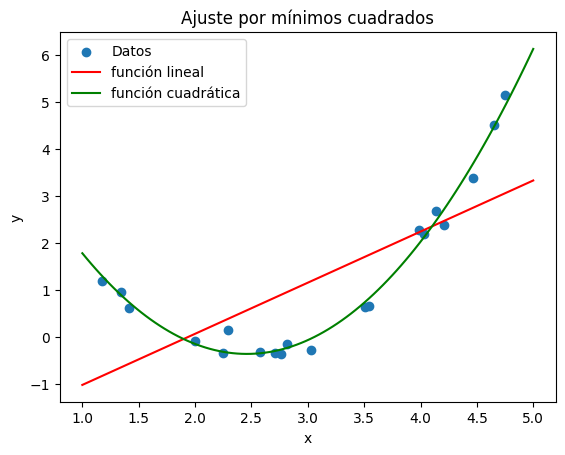

# Indicaciones
Su trabajo es ajustar el código para utilizar una función lineal y una cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.

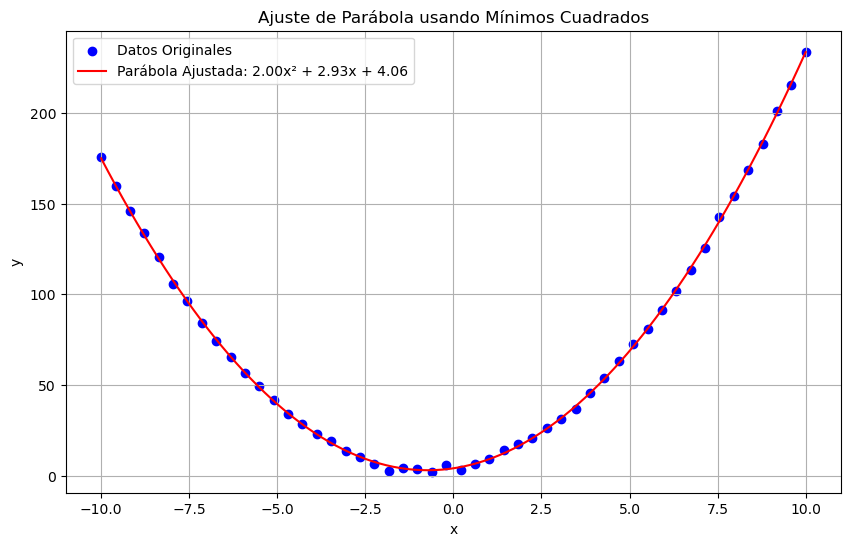

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función de ajuste: parábola
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Genera datos de ejemplo (puntos)
np.random.seed(0)
xs = np.linspace(-10, 10, 50)
true_params = (2, 3, 4)  # Parámetros verdaderos de la parábola
ys = true_params[0] * xs**2 + true_params[1] * xs + true_params[2] + np.random.normal(0, 1, len(xs))

# Ajusta la parábola a los datos usando mínimos cuadrados
popt, pcov = curve_fit(parabola, xs, ys)

# Extrae los parámetros ajustados
a_fit, b_fit, c_fit = popt

# Grafica los resultados
plt.figure(figsize=(10, 6))

# Datos originales
plt.scatter(xs, ys, color='blue', label='Datos Originales')

# Parábola ajustada
xs_fit = np.linspace(min(xs), max(xs), 100)
ys_fit = parabola(xs_fit, *popt)
plt.plot(xs_fit, ys_fit, color='red', label=f'Parábola Ajustada: {a_fit:.2f}x² + {b_fit:.2f}x + {c_fit:.2f}')

plt.title('Ajuste de Parábola usando Mínimos Cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
